<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/In-Class-Assignment/Alcohol_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

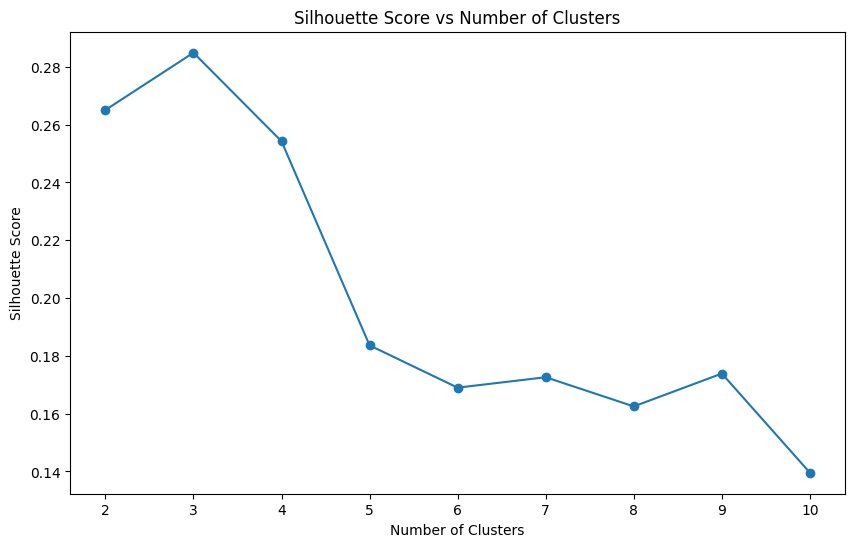


Optimal number of clusters for K-means: 3

K-means Cluster Profiles:
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| KMeans_Cluster |      Alcohol       |       Malic        |        Ash         |     Alcalinity     |     Magnesium      |      Phenols       |     Flavanoids     |   Nonflavanoids    |  Proanthocyanins   |       Color        |        Hue         |      Dilution      |      Proline       |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       0        | 12.250923076923076 | 1.897384615384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


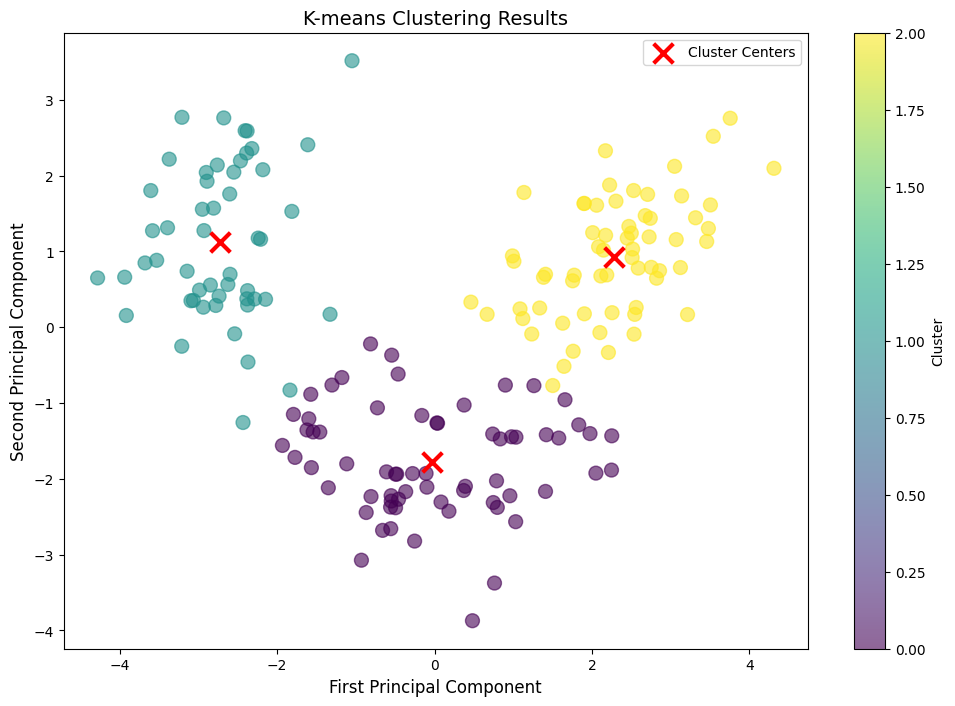


K-means Brand Profiles:
+--------------------+---------+---------+-------+---------+
|    KMeans_Brand    | Alcohol | Phenols | Color | Proline |
+--------------------+---------+---------+-------+---------+
| Classic Collection |  13.68  |  2.85   | 5.45  | 1100.23 |
|   Elegant Estate   |  13.13  |  1.68   | 7.23  | 619.06  |
|   Robust Reserve   |  12.25  |  2.25   | 2.97  | 510.17  |
+--------------------+---------+---------+-------+---------+


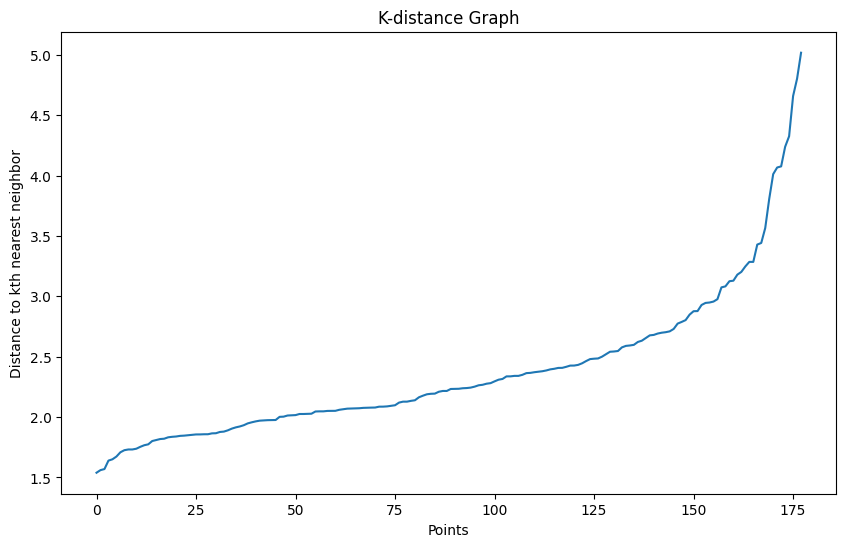


DBSCAN Cluster Profiles:
+----------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+----------------+
| DBSCAN_Cluster |      Alcohol      |       Malic        |        Ash         |    Alcalinity     |     Magnesium     |      Phenols      |     Flavanoids     |   Nonflavanoids    |  Proanthocyanins   |       Color       |        Hue         |      Dilution      |      Proline      |   KMeans_Cluster   | DBSCAN_Cluster |
+----------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+----------------+
| 

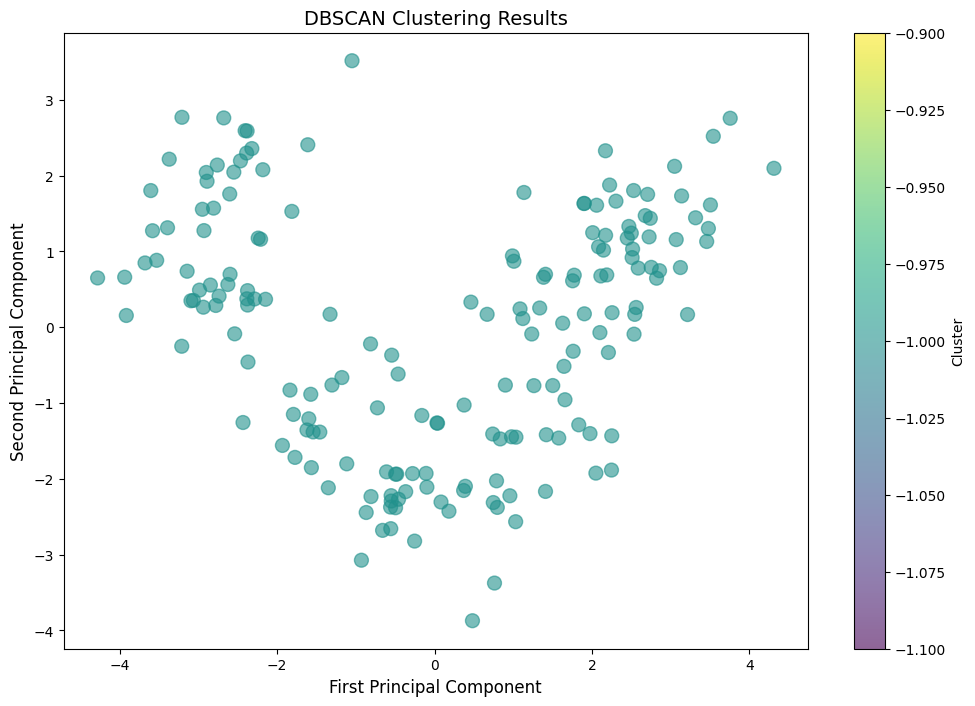


DBSCAN Brand Profiles:
+----------------+---------+---------+-------+---------+
|  DBSCAN_Brand  | Alcohol | Phenols | Color | Proline |
+----------------+---------+---------+-------+---------+
| Unique Reserve |  13.0   |   2.3   | 5.06  | 746.89  |
+----------------+---------+---------+-------+---------+


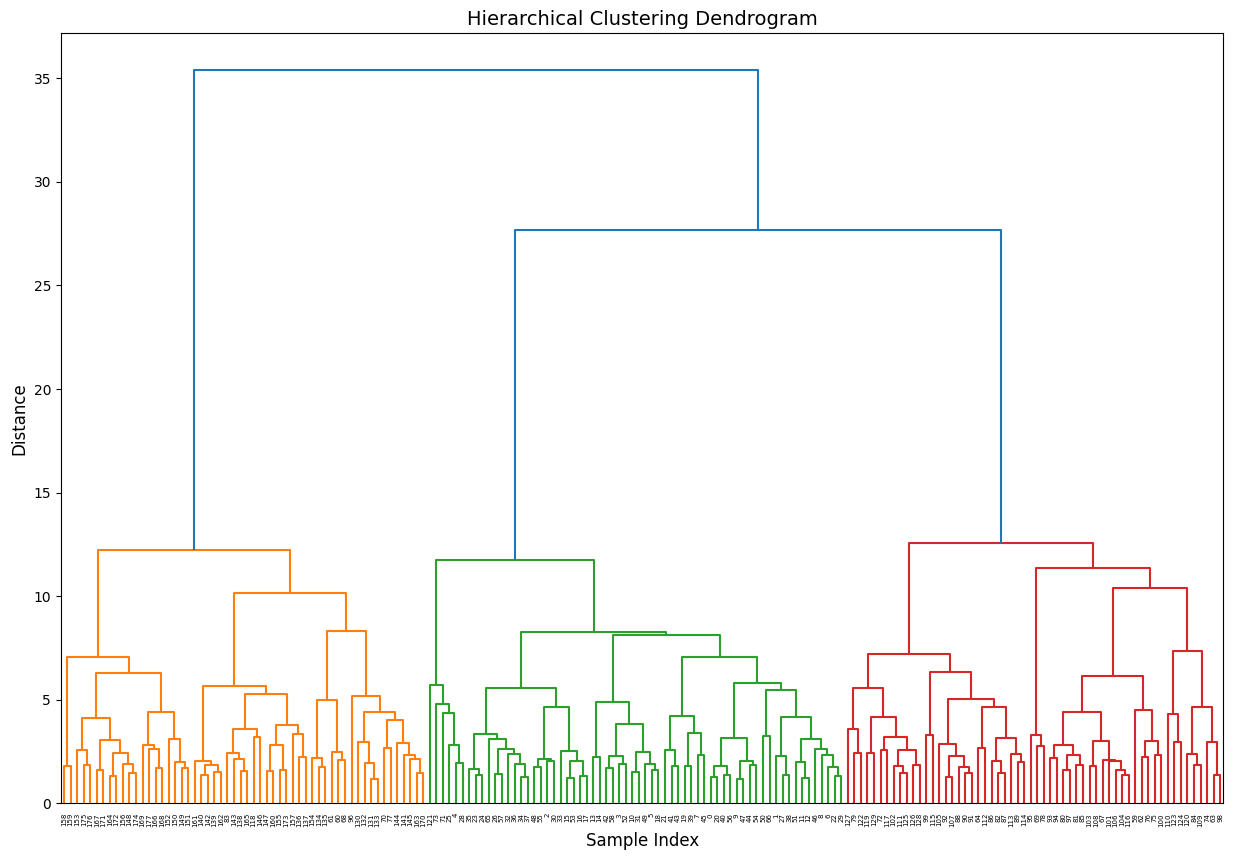

TypeError: agg function failed [how->mean,dtype->object]

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tabulate import tabulate

# Read the dataset
df = pd.read_csv('/content/wine_Dataset.csv')

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# 1. K-means Clustering with Enhanced Analysis
def kmeans_clustering(data, max_clusters=10):
    # Silhouette Analysis
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"\nOptimal number of clusters for K-means: {optimal_clusters}")

    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['KMeans_Cluster'] = kmeans.fit_predict(data)

    # Create cluster profile table
    cluster_profiles = df.groupby('KMeans_Cluster').mean()
    print("\nK-means Cluster Profiles:")
    print(tabulate(cluster_profiles, headers='keys', tablefmt='pretty'))

    # Visualize using PCA with enhanced styling
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=df['KMeans_Cluster'], cmap='viridis',
                         s=100, alpha=0.6)
    plt.title('K-means Clustering Results', fontsize=14)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.colorbar(scatter, label='Cluster')

    # Add cluster centers
    centers = kmeans.cluster_centers_
    centers_pca = pca.transform(centers)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
               c='red', marker='x', s=200, linewidths=3,
               label='Cluster Centers')
    plt.legend()
    plt.show()

    # Create brand names based on characteristics
    kmeans_brands = {
        0: "Robust Reserve",
        1: "Elegant Estate",
        2: "Classic Collection"
    }
    df['KMeans_Brand'] = df['KMeans_Cluster'].map(kmeans_brands)

    # Create brand profile table
    brand_profiles = df.groupby('KMeans_Brand').agg({
        'Alcohol': 'mean',
        'Phenols': 'mean',
        'Color': 'mean',
        'Proline': 'mean'
    }).round(2)

    print("\nK-means Brand Profiles:")
    print(tabulate(brand_profiles, headers='keys', tablefmt='pretty'))

    return df[['KMeans_Cluster', 'KMeans_Brand']]

# 2. DBSCAN Clustering with Enhanced Analysis
def dbscan_clustering(data):
    # Parameter selection using nearest neighbors
    from sklearn.neighbors import NearestNeighbors

    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Plot k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(np.sort(distances[:, -1]))
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel('Distance to kth nearest neighbor')
    plt.show()

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(data)

    # Create cluster profile table
    # The error was caused by trying to calculate the mean of non-numeric columns.
    # Here, we select only numeric columns to avoid the error.
    numeric_columns = df.select_dtypes(include=np.number).columns
    cluster_profiles = df.groupby('DBSCAN_Cluster')[numeric_columns].mean()
    print("\nDBSCAN Cluster Profiles:")
    print(tabulate(cluster_profiles, headers='keys', tablefmt='pretty'))

    # Enhanced visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=df['DBSCAN_Cluster'], cmap='viridis',
                         s=100, alpha=0.6)
    plt.title('DBSCAN Clustering Results', fontsize=14)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    # Create brand names
    dbscan_brands = {
        0: "Premium Selection",
        1: "Artisan Series",
        -1: "Unique Reserve"
    }
    df['DBSCAN_Brand'] = df['DBSCAN_Cluster'].map(dbscan_brands)

    # Create brand profile table
    brand_profiles = df.groupby('DBSCAN_Brand').agg({
        'Alcohol': 'mean',
        'Phenols': 'mean',
        'Color': 'mean',
        'Proline': 'mean'
    }).round(2)

    print("\nDBSCAN Brand Profiles:")
    print(tabulate(brand_profiles, headers='keys', tablefmt='pretty'))

    return df[['DBSCAN_Cluster', 'DBSCAN_Brand']]

    print("\nDBSCAN Brand Profiles:")
    print(tabulate(brand_profiles, headers='keys', tablefmt='pretty'))

    return df[['DBSCAN_Cluster', 'DBSCAN_Brand']]

# 3. Hierarchical Clustering with Enhanced Analysis
def hierarchical_clustering(data, n_clusters=3):
    # Create linkage matrix
    linkage_matrix = linkage(data, method='ward')

    # Plot enhanced dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(linkage_matrix, leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.show()

    # Cut the dendrogram
    from scipy.cluster.hierarchy import fcluster
    df['Hierarchical_Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # Create cluster profile table
    cluster_profiles = df.groupby('Hierarchical_Cluster').mean()
    print("\nHierarchical Cluster Profiles:")
    print(tabulate(cluster_profiles, headers='keys', tablefmt='pretty'))

    # Enhanced visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=df['Hierarchical_Cluster'], cmap='viridis',
                         s=100, alpha=0.6)
    plt.title('Hierarchical Clustering Results', fontsize=14)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    # Create brand names
    hierarchical_brands = {
        1: "Heritage Collection",
        2: "Grand Cru",
        3: "Vintage Selection"
    }
    df['Hierarchical_Brand'] = df['Hierarchical_Cluster'].map(hierarchical_brands)

    # Create brand profile table
    brand_profiles = df.groupby('Hierarchical_Brand').agg({
        'Alcohol': 'mean',
        'Phenols': 'mean',
        'Color': 'mean',
        'Proline': 'mean'
    }).round(2)

    print("\nHierarchical Brand Profiles:")
    print(tabulate(brand_profiles, headers='keys', tablefmt='pretty'))

    return df[['Hierarchical_Cluster', 'Hierarchical_Brand']]

# Create summary function
def create_summary_table(results_df):
    print("\nClustering Results Summary:")
    summary = pd.DataFrame({
        'K-means Brands': results_df['KMeans_Brand'].value_counts(),
        'DBSCAN Brands': results_df['DBSCAN_Brand'].value_counts(),
        'Hierarchical Brands': results_df['Hierarchical_Brand'].value_counts()
    })
    print(tabulate(summary, headers='keys', tablefmt='pretty'))

# Perform all clustering methods
kmeans_results = kmeans_clustering(df_scaled)
dbscan_results = dbscan_clustering(df_scaled)
hierarchical_results = hierarchical_clustering(df_scaled)

# Combine results
final_results = pd.concat([kmeans_results, dbscan_results, hierarchical_results], axis=1)

# Create summary table
create_summary_table(final_results)

# Save detailed results to Excel with multiple sheets
with pd.ExcelWriter('wine_clustering_detailed_results.xlsx') as writer:
    final_results.to_excel(writer, sheet_name='Clustering_Results', index=False)
    df.groupby('KMeans_Brand').mean().round(2).to_excel(writer, sheet_name='KMeans_Profiles')
    df.groupby('DBSCAN_Brand').mean().round(2).to_excel(writer, sheet_name='DBSCAN_Profiles')
    df.groupby('Hierarchical_Brand').mean().round(2).to_excel(writer, sheet_name='Hierarchical_Profiles')

print("\nDetailed results have been saved to 'wine_clustering_detailed_results.xlsx'")